In [17]:
import helpers
from helpers import Loader
from sklearn import metrics
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
loader = Loader()

In [3]:
X_trn, Y_trn = loader.load("trn_set", ignore_categorical=False, nrows=100000)
X_dev, Y_dev = loader.load("dev_set", ignore_categorical=False, nrows=10000)

In [4]:
ohe = preprocessing.OneHotEncoder(handle_unknown="ignore")
ohe.fit(X_trn[loader.cat_cols].fillna(0))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True)

In [5]:
X_trn_encoded = loader.encode(ohe, X_trn)
X_dev_encoded = loader.encode(ohe, X_dev)

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=0)

In [7]:
sgd_clf.fit(X_trn_encoded, Y_trn)

/Users/shawlu/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [8]:
Y_pred = sgd_clf.predict(X_dev_encoded)

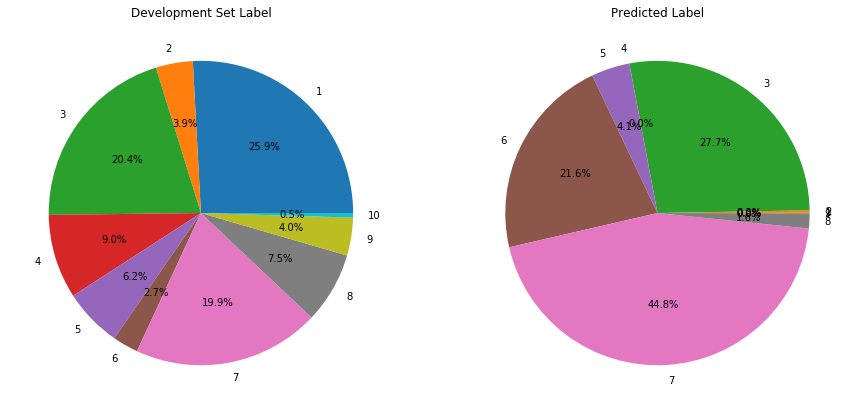

In [16]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

value_counts = Counter(Y_dev)
_ = ax1.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%', 
            labeldistance = 1.1)
ax1.set_title('Development Set Label')

ax2 = plt.subplot(1, 2, 2)

value_counts = Counter(Y_pred)
_ = ax2.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%',
            labeldistance = 1.1)

ax2.set_title('Predicted Label')

plt.show()

In [9]:
Y_dev.value_counts() / len(Y_dev)

1     0.2585
3     0.2041
7     0.1985
4     0.0895
8     0.0755
5     0.0623
9     0.0402
2     0.0393
6     0.0273
10    0.0048
Name: event2, dtype: float64

In [10]:
print("Accuracy : %.4g" % metrics.accuracy_score(Y_dev.values, Y_pred))

Accuracy : 0.2065


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_dev, Y_pred)

In [12]:
from matplotlib import pyplot as plt

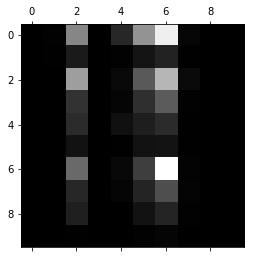

In [13]:
plt.matshow(cm, cmap=plt.cm.gray)